## Trabajadores asalariados privados no agrícolas, servicios de comida y bebidas US


In [57]:
import pandas as pd

In [58]:
ruta=r'C:\Users\Lenovo\Desktop\Modelos M\Series-de-Tiempo-Univariadas\parcial\Base_de_datos_Parcial.xlsx'
datos=pd.read_excel(ruta)
datos

,Year_Month,Desempleo Nacional US,"Trabajadores asalariados privados no agrícolas, servicios de comida y bebidas US",Nivel de fuerza laboral civil US,Fuerza Laboral Nacidos en el extranjeroUS,Tasa de ocupacion Colombia,Tasa de Ocupacion US,Tasa de Desempleo Mujeres US,Tasa de Desempleo Hispano Latino,Tasa de Desempleo Hombre,Tasa de Empleo en hombres Blancos,Desempleo colombia Ajustado,Tasa de Desempleo Mujeres Col
0,2000 Jan,NaN,7.7,141228,NaN,NaN,63.8,4.3,6.2,4.6,64.4,NaN,7.74
1,2000 Feb,4.4,7.6,141775,NaN,NaN,64.0,4.2,6.1,4.7,64.6,5.72,7.56
2,2000 Mar,4.3,7.8,142123,NaN,NaN,64.2,4.3,6.7,4.3,64.8,5.59,7.74
3,2000 Apr,3.7,6.6,142138,NaN,NaN,64.6,3.7,5.3,3.7,65.1,4.81,6.66
4,2000 May,3.8,6.4,142144,NaN,NaN,64.4,4.1,5.3,3.6,64.9,4.94,7.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,2024 Feb,4.2,4.9,167285,31002.0,56.362688,59.9,3.9,5.5,4.4,59.7,5.46,7.02
290,2024 Mar,3.9,5.5,167960,31114.0,56.678326,60.2,3.7,4.7,4.1,60.2,5.07,6.66
291,2024 Apr,3.5,5.3,167484,30482.0,57.157354,60.3,3.3,4.5,3.7,60.2,4.55,5.94
292,2024 May,3.7,6.4,167576,30896.0,57.502190,60.1,3.4,4.6,4.0,60.1,4.81,6.12


A continuación se muestran los datos de interés sobre trabajadores asalariados privados no agrícolas, servicios y bebidas de Estados  Unidos con 294 datos. Esta serie es de perioso anual. Va desde enero del 2000 hasta junio de 2024.

In [59]:
df=datos[['Year_Month','Trabajadores asalariados privados no agrícolas, servicios de comida y bebidas US']]

In [60]:
df=df.rename(columns={'Year_Month': 'fecha', 'Trabajadores asalariados privados no agrícolas, servicios de comida y bebidas US': 'trabajadores'})
df

,fecha,trabajadores
0,2000 Jan,7.7
1,2000 Feb,7.6
2,2000 Mar,7.8
3,2000 Apr,6.6
4,2000 May,6.4
...,...,...
289,2024 Feb,4.9
290,2024 Mar,5.5
291,2024 Apr,5.3
292,2024 May,6.4


In [61]:
df['fecha'] = pd.to_datetime(df['fecha'], format='%Y %b')
df

,fecha,trabajadores
0,2000-01-01,7.7
1,2000-02-01,7.6
2,2000-03-01,7.8
3,2000-04-01,6.6
4,2000-05-01,6.4
...,...,...
289,2024-02-01,4.9
290,2024-03-01,5.5
291,2024-04-01,5.3
292,2024-05-01,6.4


A conrinuación se muestra el gráfico de nuestra serie de tiempo.

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

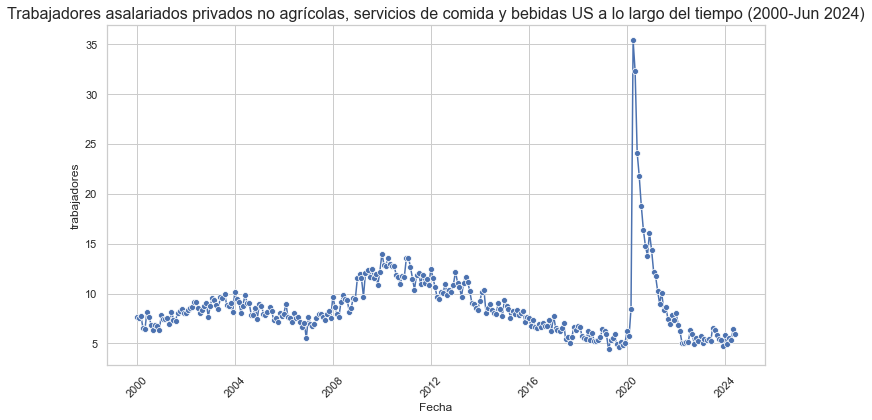

In [63]:
sns.set(style="whitegrid")

# Crear un gráfico de línea
plt.figure(figsize=(10, 6))
sns.lineplot(x='fecha', y='trabajadores', data=df, marker='o', color='b')

# Personalización del gráfico
plt.title('Trabajadores asalariados privados no agrícolas, servicios de comida y bebidas US a lo largo del tiempo (2000-Jun 2024)', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('trabajadores', fontsize=12)
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x si es necesario
plt.grid(True)

# Mostrar gráfico
plt.tight_layout()
plt.show()

Esta serie de tiempo muestra un comportamiento muy particular después del año 2020 donde se podría sospechar de un tipo de outlier transitorio, pues afecta los registros más cercanos pero prontamente se normaliza con relación al comportmiento presentado antesdel outlier.

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox

df['trabajadores_box'], lambda_bc = boxcox(df['trabajadores'])

# Opcionalmente, puedes imprimir lambda si lo necesitas
print(f"Lambda usado en la transformación Box-Cox: {lambda_bc}")



Lambda usado en la transformación Box-Cox: -0.6527802632191724


Se ve la necesidad entonces de aplicar transformación de box-cox con $\lambda=-0.6527$. Esto con el objetivo de **Estabilizar la varianza**.

In [65]:
df

,fecha,trabajadores,trabajadores_box
0,2000-01-01,7.7,1.127753
1,2000-02-01,7.6,1.124289
2,2000-03-01,7.8,1.131143
3,2000-04-01,6.6,1.084967
4,2000-05-01,6.4,1.075899
...,...,...,...
289,2024-02-01,4.9,0.989051
290,2024-03-01,5.5,1.028479
291,2024-04-01,5.3,1.016158
292,2024-05-01,6.4,1.075899


In [66]:
df_box=df[['fecha','trabajadores_box']]

A continuación se muestra cómo se ve nuestra serie una vez se aplicó la transformación box y cox. 

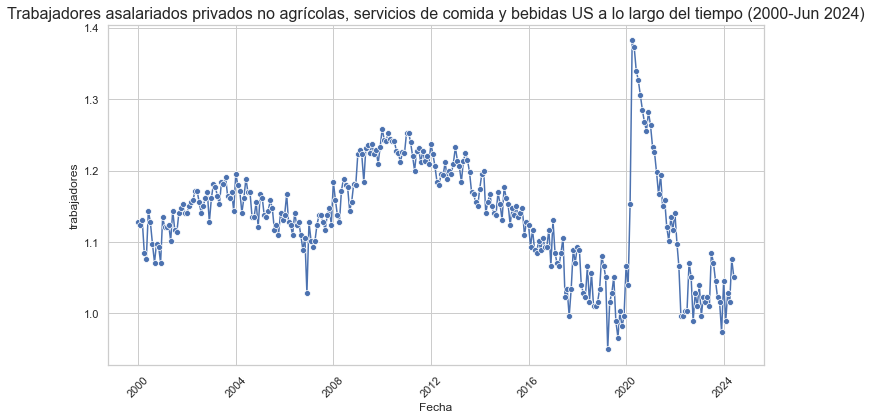

In [67]:
sns.set(style="whitegrid")

# Crear un gráfico de línea
plt.figure(figsize=(10, 6))
sns.lineplot(x='fecha', y='trabajadores_box', data=df_box, marker='o', color='b')

# Personalización del gráfico
plt.title('Trabajadores asalariados privados no agrícolas, servicios de comida y bebidas US a lo largo del tiempo (2000-Jun 2024)', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('trabajadores', fontsize=12)
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x si es necesario
plt.grid(True)

# Mostrar gráfico
plt.tight_layout()
plt.show()

In [68]:
df['trabajadores_box2'], lambda_bc2 = boxcox(df['trabajadores_box'])

# Opcionalmente, puedes imprimir lambda si lo necesitas
print(f"Lambda usado en la transformación Box-Cox: {lambda_bc2}")

Lambda usado en la transformación Box-Cox: 1.0880725974870245


Al volver a revisar si en efeco ya la varianza de nuestra serie estaba estabilizada, podemos decir con el $\lambda$ tan cercano a uno obtenido ya nuestra **varianza se encuentra estabilizada**.

**Removiendo tendencia**

Como se evidenció en el análisis descriptivo de la serie de tiempo, es preciso realizar una diferenciación de orden 1 pra remover la tendencia.

In [69]:
df_box['diferenciado_1'] = df_box['trabajadores_box'].diff()  # Primera diferenciación

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10296\2840231294.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_box['diferenciado_1'] = df_box['trabajadores_box'].diff()  # Primera diferenciación


In [70]:
df_box

,fecha,trabajadores_box,diferenciado_1
0,2000-01-01,1.127753,NaN
1,2000-02-01,1.124289,-0.003464
2,2000-03-01,1.131143,0.006853
3,2000-04-01,1.084967,-0.046175
4,2000-05-01,1.075899,-0.009069
...,...,...,...
289,2024-02-01,0.989051,-0.056583
290,2024-03-01,1.028479,0.039429
291,2024-04-01,1.016158,-0.012321
292,2024-05-01,1.075899,0.059741


A continuación se muestra cómo se ve nuestra serie con transformación box-cox y diferenciada una avez.

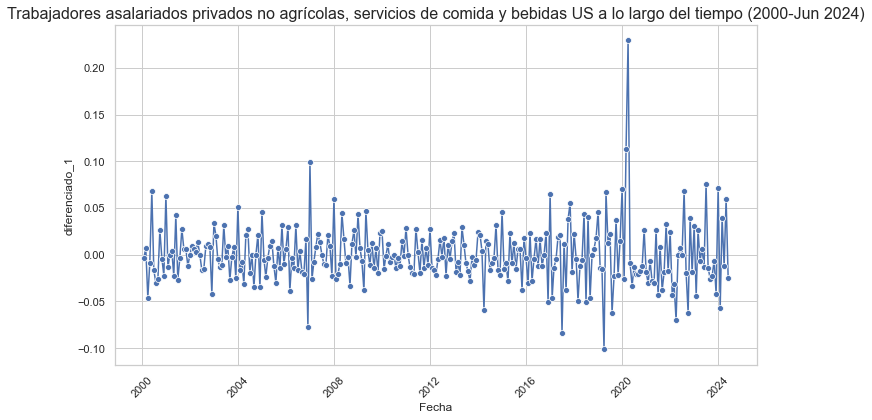

In [71]:
sns.set(style="whitegrid")

# Crear un gráfico de línea
plt.figure(figsize=(10, 6))
sns.lineplot(x='fecha', y='diferenciado_1', data=df_box, marker='o', color='b')

# Personalización del gráfico
plt.title('Trabajadores asalariados privados no agrícolas, servicios de comida y bebidas US a lo largo del tiempo (2000-Jun 2024)', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('diferenciado_1', fontsize=12)
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x si es necesario
plt.grid(True)

# Mostrar gráfico
plt.tight_layout()
plt.show()

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import tensorflow as tf
from datetime import timedelta

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, TimeSeriesSplit, GridSearchCV

import tensorflow.keras as keras

sample = df_box['diferenciado_1'][1:]
adf, p, usedlag, nobs, cvs, aic = sm.tsa.stattools.adfuller(sample)

In [73]:
adf_results_string = 'ADF: {}\np-value: {},\nN: {}, \ncritical values: {}'
print(adf_results_string.format(adf, p, nobs, cvs))

ADF: -20.56572168111044
p-value: 0.0,
N: 292, 
critical values: {'1%': -3.4529449243622383, '5%': -2.871489553425686, '10%': -2.572071437887033}


Aquí rechazamos la hipótesis nula ya que el valor p es menor que 0.01, por lo tanto,  podemos rechazar la prueba al nivel de confianza del 99%. Esto sugiere que la serie temporal  es **estacionaria**.

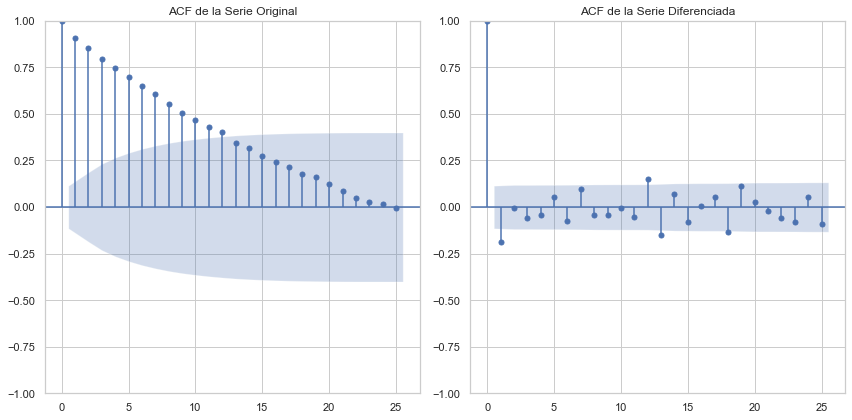

In [74]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Graficar ACF de la serie original
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_acf(df_box['trabajadores_box'], ax=plt.gca())
plt.title('ACF de la Serie Original')

# Graficar ACF de la serie diferenciada
plt.subplot(1, 2, 2)
plot_acf(df_box['diferenciado_1'].dropna(), ax=plt.gca())
plt.title('ACF de la Serie Diferenciada')

plt.tight_layout()
plt.show()

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


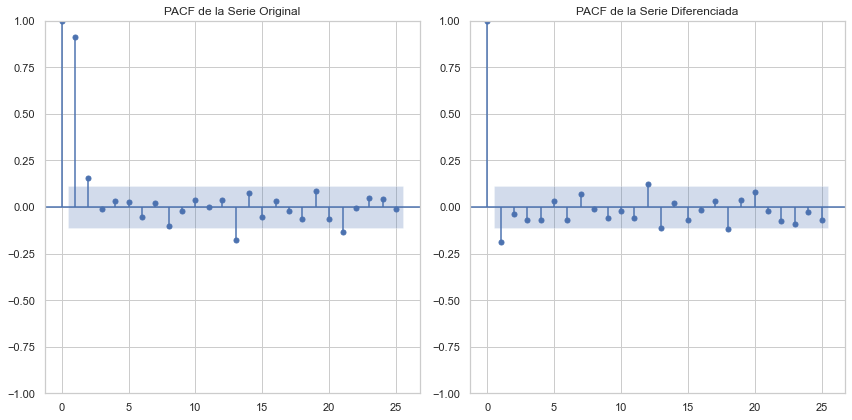

In [75]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf

# Graficar ACF de la serie original
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_pacf(df_box['trabajadores_box'], ax=plt.gca())
plt.title('PACF de la Serie Original')

# Graficar ACF de la serie diferenciada
plt.subplot(1, 2, 2)
plot_pacf(df_box['diferenciado_1'].dropna(), ax=plt.gca())
plt.title('PACF de la Serie Diferenciada')

plt.tight_layout()
plt.show()

**Periodograma**

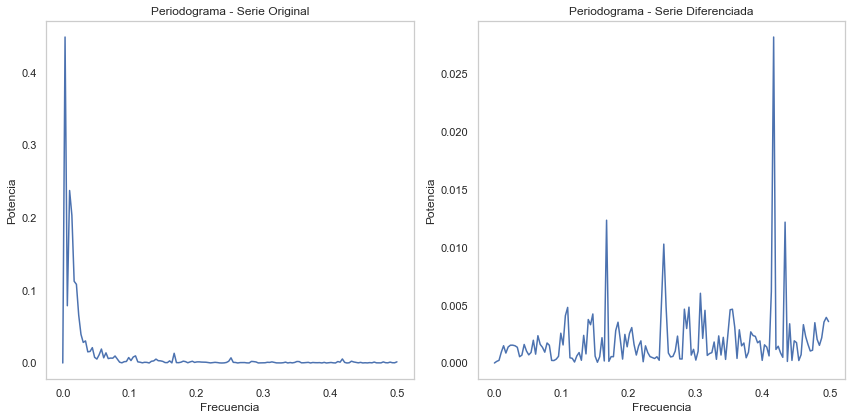

In [76]:
from scipy.signal import periodogram

# Calcular el periodograma de la serie original
frecuencias_orig, potencia_orig = periodogram(df_box['trabajadores_box'].dropna())

# Calcular el periodograma de la serie diferenciada
frecuencias_diff, potencia_diff = periodogram(df_box['diferenciado_1'].dropna())

# Graficar los periodogramas
plt.figure(figsize=(12, 6))

# Periodograma de la serie original
plt.subplot(1, 2, 1)
plt.plot(frecuencias_orig, potencia_orig)
plt.title('Periodograma - Serie Original')
plt.xlabel('Frecuencia')
plt.ylabel('Potencia')
plt.grid()

# Periodograma de la serie diferenciada
plt.subplot(1, 2, 2)
plt.plot(frecuencias_diff, potencia_diff)
plt.title('Periodograma - Serie Diferenciada')
plt.xlabel('Frecuencia')
plt.ylabel('Potencia')
plt.grid()

plt.tight_layout()
plt.show()

In [77]:
a=max(frecuencias_diff)
1/a

2.006849315068493

En este caso, aunque el periodo que sobre sale es el 2, en el análisis descriptivo se encontró que la serie puede tener potencialmente una estacionalidad anual, lo cual será tenido en cuenta posteriormente.

### Incorporando variables necesarias

Con el objetivo de incorporar la variable de intervención en el modelo de red neuronal multicapa, se utilizará una variable dummy que indica las fechas en las que se registraron datos atípicos que correspondieron a los meses de:**243,244** debido a alguna intervención o acontecimiento especial. 

**Incorporando variables de intervención de acuerdo al outlier detectado**

In [78]:
outliers=[243,244]
df_box['intervencion'] = 0  # Inicializar en 0
df_box['intervencion'].iloc[outliers] = 1  

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10296\3388627236.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_box['intervencion'].iloc[outliers] = 1


In [79]:
df_box

,fecha,trabajadores_box,diferenciado_1,intervencion
0,2000-01-01,1.127753,NaN,0
1,2000-02-01,1.124289,-0.003464,0
2,2000-03-01,1.131143,0.006853,0
3,2000-04-01,1.084967,-0.046175,0
4,2000-05-01,1.075899,-0.009069,0
...,...,...,...,...
289,2024-02-01,0.989051,-0.056583,0
290,2024-03-01,1.028479,0.039429,0
291,2024-04-01,1.016158,-0.012321,0
292,2024-05-01,1.075899,0.059741,0


**Creando las variables rezagadas (para configuración de predicción dos pasos adelante**

Con el objetivo de maximizar la información valiosa para nuestra serie, se decidió incorporar los rezagos de **2, 3, 6 y 12**, considerando que estamos configurando nuestros datos para realizar una predicción a dos pasos adelante. Los rezagos de **3, 6 y 12** fueron seleccionados basándonos en el gráfico de Autocorrelación Múltiple (AMI), que nos proporciona información sobre aquellos rezagos que aportan datos significativos sobre nuestra variable de interés. De esta manera, a través del AMI, identificamos estos rezagos como relevantes.

In [80]:
for lag in [2, 3, 6, 12]:
    df_box[f't-{lag}'] = df_box['diferenciado_1'].shift(lag)

# Mostrar el resultado
print(df_box)

         fecha  trabajadores_box  diferenciado_1  intervencion       t-2  \
0   2000-01-01          1.127753             NaN             0       NaN   
1   2000-02-01          1.124289       -0.003464             0       NaN   
2   2000-03-01          1.131143        0.006853             0       NaN   
3   2000-04-01          1.084967       -0.046175             0 -0.003464   
4   2000-05-01          1.075899       -0.009069             0  0.006853   
..         ...               ...             ...           ...       ...   
289 2024-02-01          0.989051       -0.056583             0 -0.042078   
290 2024-03-01          1.028479        0.039429             0  0.071553   
291 2024-04-01          1.016158       -0.012321             0 -0.056583   
292 2024-05-01          1.075899        0.059741             0  0.039429   
293 2024-06-01          1.051030       -0.024869             0 -0.012321   

          t-3       t-6      t-12  
0         NaN       NaN       NaN  
1         NaN  

### Incorporando las componentes de fourioer para la estacionalidad anual.

Dado que en el análisis descriptivo se dió a conocer que nuestra serie tiene potencialmente una estacionalidad anual, decidimos entonces incorporar en nuestro conjunto de variables tres componetes de fourier con periodo anual.

In [81]:
date_time=df_box['fecha']
type(date_time)

pandas.core.series.Series

In [82]:
date_time.map(pd.Timestamp.timestamp) 

0      9.466848e+08
1      9.493632e+08
2      9.518688e+08
3      9.545472e+08
4      9.571392e+08
           ...     
289    1.706746e+09
290    1.709251e+09
291    1.711930e+09
292    1.714522e+09
293    1.717200e+09
Name: fecha, Length: 294, dtype: float64

In [83]:
timestamp_s = date_time.map(pd.Timestamp.timestamp)
timestamp_s

0      9.466848e+08
1      9.493632e+08
2      9.518688e+08
3      9.545472e+08
4      9.571392e+08
           ...     
289    1.706746e+09
290    1.709251e+09
291    1.711930e+09
292    1.714522e+09
293    1.717200e+09
Name: fecha, Length: 294, dtype: float64

In [84]:
# Periodos
anio = 365.25 * 24 * 60 * 60  # segundos en un año

# Componentes estacionales anuales
df_box['Year sin'] = np.sin(timestamp_s * (2 * np.pi / anio))
df_box['Year cos'] = np.cos(timestamp_s * (2 * np.pi / anio))

df_box['Year sin 2'] = np.sin(timestamp_s * (2 * np.pi*2 / anio))
df_box['Year cos 2'] = np.cos(timestamp_s * (2 * np.pi*2 / anio))

df_box['Year sin 3'] = np.sin(timestamp_s * (2 * np.pi*3 / anio))
df_box['Year cos 3'] = np.cos(timestamp_s * (2 * np.pi*3 / anio))

Text(0.5, 1.0, 'Time of year signal')

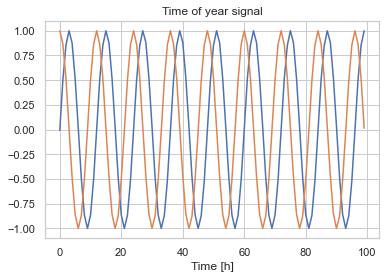

In [85]:
plt.plot(np.array(df_box['Year sin'])[:100])
plt.plot(np.array(df_box['Year cos'])[:100])
plt.xlabel('Time [h]')
plt.title('Time of year signal')

In [87]:
df_box

,fecha,trabajadores_box,diferenciado_1,intervencion,t-2,t-3,t-6,t-12,Year sin,Year cos,Year sin 2,Year cos 2,Year sin 3,Year cos 3
0,2000-01-01,1.127753,NaN,0,NaN,NaN,NaN,NaN,-0.008601,0.999963,-0.017202,0.999852,-0.025801,0.999667
1,2000-02-01,1.124289,-0.003464,0,NaN,NaN,NaN,NaN,0.500931,0.865487,0.867099,0.498137,0.999995,-0.003225
2,2000-03-01,1.131143,0.006853,0,NaN,NaN,NaN,NaN,0.853958,0.520343,0.888701,-0.458487,0.070900,-0.997483
3,2000-04-01,1.084967,-0.046175,0,-0.003464,NaN,NaN,NaN,0.999902,0.013977,0.027950,-0.999609,-0.999121,-0.041919
4,2000-05-01,1.075899,-0.009069,0,0.006853,-0.003464,NaN,NaN,0.876576,-0.481264,-0.843728,-0.536771,-0.064464,0.997920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,2024-02-01,0.989051,-0.056583,0,-0.042078,-0.006255,-0.013781,-0.043919,0.500931,0.865487,0.867099,0.498137,0.999995,-0.003225
290,2024-03-01,1.028479,0.039429,0,0.071553,-0.042078,-0.025553,0.026250,0.853958,0.520343,0.888701,-0.458487,0.070900,-0.997483
291,2024-04-01,1.016158,-0.012321,0,-0.056583,0.071553,-0.023221,-0.006255,0.999902,0.013977,0.027950,-0.999609,-0.999121,-0.041919
292,2024-05-01,1.075899,0.059741,0,0.039429,-0.056583,-0.006255,0.006255,0.876576,-0.481264,-0.843728,-0.536771,-0.064464,0.997920


In [88]:
df_box.index=df_box['fecha']

In [89]:
base=df_box.iloc[13:]

In [90]:
base

,fecha,trabajadores_box,diferenciado_1,intervencion,t-2,t-3,t-6,t-12,Year sin,Year cos,Year sin 2,Year cos 2,Year sin 3,Year cos 3
fecha,,,,,,,,,,,,,,
2001-02-01,2001-02-01,1.120750,-0.013712,0,-0.022406,-0.004157,-0.030003,-0.003464,0.512055,0.858953,0.879662,0.475599,0.999121,-0.041919
2001-03-01,2001-03-01,1.120750,0.000000,0,0.063275,-0.022406,-0.026563,0.006853,0.851712,0.524010,0.892612,-0.450826,0.083764,-0.996486
2001-04-01,2001-04-01,1.124289,0.003540,0,-0.013712,0.063275,0.026563,-0.046175,0.999833,0.018277,0.036547,-0.999332,-0.998497,-0.054805
2001-05-01,2001-05-01,1.101809,-0.022480,0,0.000000,-0.013712,-0.004157,-0.009069,0.878637,-0.477489,-0.839080,-0.544008,-0.077334,0.997005
2001-06-01,2001-06-01,1.144015,0.042206,0,0.003540,0.000000,-0.022406,0.068116,0.513901,-0.857849,-0.881699,0.471812,0.998830,0.048363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-01,2024-02-01,0.989051,-0.056583,0,-0.042078,-0.006255,-0.013781,-0.043919,0.500931,0.865487,0.867099,0.498137,0.999995,-0.003225
2024-03-01,2024-03-01,1.028479,0.039429,0,0.071553,-0.042078,-0.025553,0.026250,0.853958,0.520343,0.888701,-0.458487,0.070900,-0.997483
2024-04-01,2024-04-01,1.016158,-0.012321,0,-0.056583,0.071553,-0.023221,-0.006255,0.999902,0.013977,0.027950,-0.999609,-0.999121,-0.041919


In [91]:
base=base.drop(base.columns[0], axis=1)

In [92]:
base

,trabajadores_box,diferenciado_1,intervencion,t-2,t-3,t-6,t-12,Year sin,Year cos,Year sin 2,Year cos 2,Year sin 3,Year cos 3
fecha,,,,,,,,,,,,,
2001-02-01,1.120750,-0.013712,0,-0.022406,-0.004157,-0.030003,-0.003464,0.512055,0.858953,0.879662,0.475599,0.999121,-0.041919
2001-03-01,1.120750,0.000000,0,0.063275,-0.022406,-0.026563,0.006853,0.851712,0.524010,0.892612,-0.450826,0.083764,-0.996486
2001-04-01,1.124289,0.003540,0,-0.013712,0.063275,0.026563,-0.046175,0.999833,0.018277,0.036547,-0.999332,-0.998497,-0.054805
2001-05-01,1.101809,-0.022480,0,0.000000,-0.013712,-0.004157,-0.009069,0.878637,-0.477489,-0.839080,-0.544008,-0.077334,0.997005
2001-06-01,1.144015,0.042206,0,0.003540,0.000000,-0.022406,0.068116,0.513901,-0.857849,-0.881699,0.471812,0.998830,0.048363
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-01,0.989051,-0.056583,0,-0.042078,-0.006255,-0.013781,-0.043919,0.500931,0.865487,0.867099,0.498137,0.999995,-0.003225
2024-03-01,1.028479,0.039429,0,0.071553,-0.042078,-0.025553,0.026250,0.853958,0.520343,0.888701,-0.458487,0.070900,-0.997483
2024-04-01,1.016158,-0.012321,0,-0.056583,0.071553,-0.023221,-0.006255,0.999902,0.013977,0.027950,-0.999609,-0.999121,-0.041919


In [93]:
base_final=base[['intervencion','Year sin','Year cos','Year sin 2','Year cos 2','Year sin 3','Year cos 3','t-12','t-6','t-3','t-2','diferenciado_1']]

In [94]:
base_final

,intervencion,Year sin,Year cos,Year sin 2,Year cos 2,Year sin 3,Year cos 3,t-12,t-6,t-3,t-2,diferenciado_1
fecha,,,,,,,,,,,,
2001-02-01,0,0.512055,0.858953,0.879662,0.475599,0.999121,-0.041919,-0.003464,-0.030003,-0.004157,-0.022406,-0.013712
2001-03-01,0,0.851712,0.524010,0.892612,-0.450826,0.083764,-0.996486,0.006853,-0.026563,-0.022406,0.063275,0.000000
2001-04-01,0,0.999833,0.018277,0.036547,-0.999332,-0.998497,-0.054805,-0.046175,0.026563,0.063275,-0.013712,0.003540
2001-05-01,0,0.878637,-0.477489,-0.839080,-0.544008,-0.077334,0.997005,-0.009069,-0.004157,-0.013712,0.000000,-0.022480
2001-06-01,0,0.513901,-0.857849,-0.881699,0.471812,0.998830,0.048363,0.068116,-0.022406,0.000000,0.003540,0.042206
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-01,0,0.500931,0.865487,0.867099,0.498137,0.999995,-0.003225,-0.043919,-0.013781,-0.006255,-0.042078,-0.056583
2024-03-01,0,0.853958,0.520343,0.888701,-0.458487,0.070900,-0.997483,0.026250,-0.025553,-0.042078,0.071553,0.039429
2024-04-01,0,0.999902,0.013977,0.027950,-0.999609,-0.999121,-0.041919,-0.006255,-0.023221,0.071553,-0.056583,-0.012321


In [95]:
base_final=base_final.rename(columns={'diferenciado_1': 't'})

In [96]:
base_final

,intervencion,Year sin,Year cos,Year sin 2,Year cos 2,Year sin 3,Year cos 3,t-12,t-6,t-3,t-2,t
fecha,,,,,,,,,,,,
2001-02-01,0,0.512055,0.858953,0.879662,0.475599,0.999121,-0.041919,-0.003464,-0.030003,-0.004157,-0.022406,-0.013712
2001-03-01,0,0.851712,0.524010,0.892612,-0.450826,0.083764,-0.996486,0.006853,-0.026563,-0.022406,0.063275,0.000000
2001-04-01,0,0.999833,0.018277,0.036547,-0.999332,-0.998497,-0.054805,-0.046175,0.026563,0.063275,-0.013712,0.003540
2001-05-01,0,0.878637,-0.477489,-0.839080,-0.544008,-0.077334,0.997005,-0.009069,-0.004157,-0.013712,0.000000,-0.022480
2001-06-01,0,0.513901,-0.857849,-0.881699,0.471812,0.998830,0.048363,0.068116,-0.022406,0.000000,0.003540,0.042206
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-01,0,0.500931,0.865487,0.867099,0.498137,0.999995,-0.003225,-0.043919,-0.013781,-0.006255,-0.042078,-0.056583
2024-03-01,0,0.853958,0.520343,0.888701,-0.458487,0.070900,-0.997483,0.026250,-0.025553,-0.042078,0.071553,0.039429
2024-04-01,0,0.999902,0.013977,0.027950,-0.999609,-0.999121,-0.041919,-0.006255,-0.023221,0.071553,-0.056583,-0.012321


**Conjunto de entrenamiento validación y prueba y normalización de las variables**

In [97]:
fecha_entrenamiento_final = '2021-12-31'
fecha_validacion_inicio = '2022-01-01'
fecha_validacion_final = '2022-12-31'
fecha_prueba_inicio = '2023-01-01'
fecha_prueba_final = '2024-04-30'

entrenamiento = base_final.loc[:fecha_entrenamiento_final]
validacion = base_final.loc[fecha_validacion_inicio:fecha_validacion_final]
prueba = base_final.loc[fecha_prueba_inicio:fecha_prueba_final]

In [98]:
# Mostrar los resultados
print("Datos de Entrenamiento:")
print(entrenamiento)

print("\nDatos de Validación:")
print(validacion)

print("\nDatos de Prueba:")
print(prueba)

Datos de Entrenamiento:
            intervencion  Year sin  Year cos  Year sin 2  Year cos 2  \
fecha                                                                  
2001-02-01             0  0.512055  0.858953    0.879662    0.475599   
2001-03-01             0  0.851712  0.524010    0.892612   -0.450826   
2001-04-01             0  0.999833  0.018277    0.036547   -0.999332   
2001-05-01             0  0.878637 -0.477489   -0.839080   -0.544008   
2001-06-01             0  0.513901 -0.857849   -0.881699    0.471812   
...                  ...       ...       ...         ...         ...   
2021-08-01             0 -0.487847 -0.872929    0.851712    0.524010   
2021-09-01             0 -0.863867 -0.503720    0.870294   -0.492533   
2021-10-01             0 -0.999930 -0.011826    0.023651   -0.999720   
2021-11-01             0 -0.867099  0.498137   -0.863867   -0.503720   
2021-12-01             0 -0.508356  0.861147   -0.875539    0.483147   

            Year sin 3  Year cos 3     

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X_train=entrenamiento.iloc[:, :-1]
X_train

#Normalización
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)

In [100]:
Y_train=entrenamiento.iloc[:,1]
Y_train
train_mean = Y_train.mean()
train_std = Y_train.std()

Y_train = (Y_train - train_mean) / train_std


In [101]:
X_test=prueba.iloc[:, :-1]
X_test
X_test=scaler.fit_transform(X_test)

In [102]:
Y_test=prueba.iloc[:, -1]
Y_test
Y_test = (Y_test - train_mean) / train_std


In [103]:
X_val=validacion.iloc[:, :-1]
X_val
X_val=scaler.fit_transform(X_val)

In [104]:
Y_val=validacion.iloc[:, -1]
Y_val
Y_val = (Y_val - train_mean) / train_std


**Respondiendo al requerimiento** capas ocultas 1 o 2, cada capa oculta con 8 o 32 nodos o neuronas, y con funci ́on de activaci ́on tanh o Relu (el tama ̃no del lote debe ser igual 10, el algoritmo de optimizaci ́on que usted crea conveniente, al igual que la la tasa de aprendizaje, y n ́umero de epochs no menor a 50). Se configura la validación cruzada para determinar los mejores hiperparámetros para nuestro modelo final.

In [105]:
from tensorflow import keras
import keras_tuner as kt
from tensorflow.keras import layers

In [106]:
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Dense(units=hp.Int("num_units", min_value=8, max_value=32, step=10),
                activation=hp.Choice("activation", ["tanh", "relu"])))
    # Tune the number of layers.
    for i in range(hp.Int("num_layers", 1, 2)):
        model.add(
            layers.Dense(
                # Tune number of units separately.
                units=hp.Int(f"units_{i}", min_value=8, max_value=32, step=10),
                activation=hp.Choice("activation", ["relu", "tanh"]),
            )
        )
    if hp.Boolean("dropout"):
        model.add(layers.Dropout(rate=0.25))
    model.add(layers.Dense(1, activation="linear"))
    learning_rate = hp.Float("lr", min_value=1e-3, max_value=1e-2,step=0.003)
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss="mean_squared_error",
        metrics=["mean_squared_error"]
    )
    return model


build_model(kt.HyperParameters())

In [107]:
tuner_GridSearch_mlp = kt.GridSearch(
    hypermodel=build_model,
    objective="val_loss",
    max_trials=None,
    executions_per_trial=1,
    overwrite=True,
    directory="dirsalida",
    project_name="helloworld",
)

In [108]:
stop_early=tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=2)

In [109]:
print(base_final.isnull().sum()) 

intervencion    0
Year sin        0
Year cos        0
Year sin 2      0
Year cos 2      0
Year sin 3      0
Year cos 3      0
t-12            0
t-6             0
t-3             0
t-2             0
t               0
dtype: int64


In [ ]:
tuner_GridSearch_mlp.search(X_train,Y_train, epochs=50, validation_data=(X_val,Y_val),callbacks=[stop_early])

Trial 366 Complete [00h 00m 08s]
val_loss: 0.49250754714012146

Best val_loss So Far: 0.00448890496045351
Total elapsed time: 00h 38m 55s

Search: Running Trial #367

Value             |Best Value So Far |Hyperparameter
18                |8                 |num_units
tanh              |relu              |activation
2                 |2                 |num_layers
28                |18                |units_0
False             |True              |dropout
0.007             |0.001             |lr
8                 |28                |units_1

Epoch 1/50


In [ ]:
# Get the top 2 models.
shape = (7, 64)
initial_value = tf.random.normal(shape=(shape[0], shape[1]))

# Crear la variable con el valor inicial y la forma especificada
variable = tf.Variable(initial_value, shape=shape)

# Verificar la forma de la variable creada
print("Shape de la variable:", variable.shape)

In [ ]:
tuner_GridSearch_mlp.results_summary()

In [ ]:
x_all = np.concatenate((X_train, X_val))
y_all = np.concatenate((y_train, y_val))

In [ ]:
callback=tf.keras.callbacks.EarlyStopping(monitor="loss",patience=5)
best_hps_mlp = tuner_GridSearch_mlp.get_best_hyperparameters(2)
model_mlp = build_model(best_hps_mlp[0])
# Fit with the entire dataset.
model_mlp.fit(x_all,y_all, epochs=50,callbacks=[callback])

In [ ]:
prediction_test=model_mlp.predict( X_test, verbose=1)

In [ ]:
y_test=Y_test.reshape((Y_test.shape[0], 1))

In [ ]:
plt.plot(Y_test)
plt.plot(prediction_test)
plt.legend(['Respuesta real','Predicción de la Respuesta'],loc="best", fontsize=12)
plt.ylabel('Y y $\hat{Y}$ en conjunto de prueba', fontsize=14)

In [ ]:
errors_squared=tf.keras.metrics.mean_squared_error(y_test, prediction_test).numpy()
print("RECM:",errors_squared.mean()**0.5)

In [ ]:
plt.plot(y_test)
plt.plot(prediction_test)
plt.legend(['Respuesta real','Predicción de la Respuesta'],loc="best", fontsize=12)
plt.ylabel('Y y $\hat{Y}$ en conjunto de prueba', fontsize=14)

In [ ]:
plt.plot(prediction_test-y_test)
plt.legend(['Error de predicción'],loc="best", fontsize=12)
plt.ylabel('$\hat{e}$ en conjunto de prueba', fontsize=12)

In [ ]:
**Bajo la escala original**

In [ ]:
def diferencia(n,x,dif):
  vector=np.array([x])
  for i in range(0,n):
    a=vector[0]
    b=dif[i]
    res=vector[i]+b
    vector=np.append(vector,res)
  return(vector)

In [ ]:
serie_revertida =Y_test.cumsum-0.018774
serie_revertida =serie_revertida*train_std+train_mean
lambda_boxcox = -0.65
# Para deshacer la transformación de Box-Cox
y_original_test = np.power((serie_revertida * lambda_boxcox) + 1, 1 / lambda_boxcox)

In [ ]:
pred_revertida =prediction_test.cumsum-0.018774
pred_revertida =prediction_test*train_std+train_mean
lambda_boxcox = -0.65
# Para deshacer la transformación de Box-Cox
y_original_pred = np.power((prediction_test * lambda_boxcox) + 1, 1 / lambda_boxcox)

In [ ]:
plt.plot(y_original_test)
plt.plot(y_original_pred)
plt.legend(['Respuesta real','Predicción de la Respuesta'],loc="best", fontsize=12)
plt.ylabel('Y y $\hat{Y}$ en conjunto de prueba bajo escala original', fontsize=14)

### Punto 2: Residuales del modelo

In [ ]:
residuales=y_original_test-y_original_pred
residuales

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pandas as pd

# Crear una figura con subgráficos
fig, axes = plt.subplots(3, 1, figsize=(10, 12))

# 1. Gráfico de los residuales
sns.lineplot(x=range(len(residuales)), y=residuales, ax=axes[0], marker='o')
axes[0].set_title('Residuales del Modelo')
axes[0].set_xlabel('Índice')
axes[0].set_ylabel('Residuales')

sm.graphics.tsa.plot_acf(residuales, lags=20, ax=axes[1])
axes[1].set_title('Autocorrelación Simple (ACF) de los Residuales')

# 3. Gráfico de la autocorrelación parcial (PACF)
sm.graphics.tsa.plot_pacf(residuales, lags=20, ax=axes[2])
axes[2].set_title('Autocorrelación Parcial (PACF) de los Residuales')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

### Punto 3: Error cuadrático medio de  predicción dos pasos adelante

In [ ]:
errors_squared=tf.keras.metrics.mean_squared_error(y_original_test, y_original_pred).numpy()
print("RECM:",errors_squared.mean()**0.5)